[Veja o dataset no Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

In [11]:
import pandas as pd

# Lendo o arquivo
df = pd.read_csv("../data/Sample-Superstore.csv", encoding='latin1')

# Mostrando as primeiras linhas
print(df.head())

# Informações iniciais
print(df.info())

# Verificando valores ausentes
print(df.isnull().sum())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [12]:
# Converter para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Criar colunas auxiliares
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df['Year-Month'] = df['Order Date'].dt.to_period('M')

Faturamento por mês

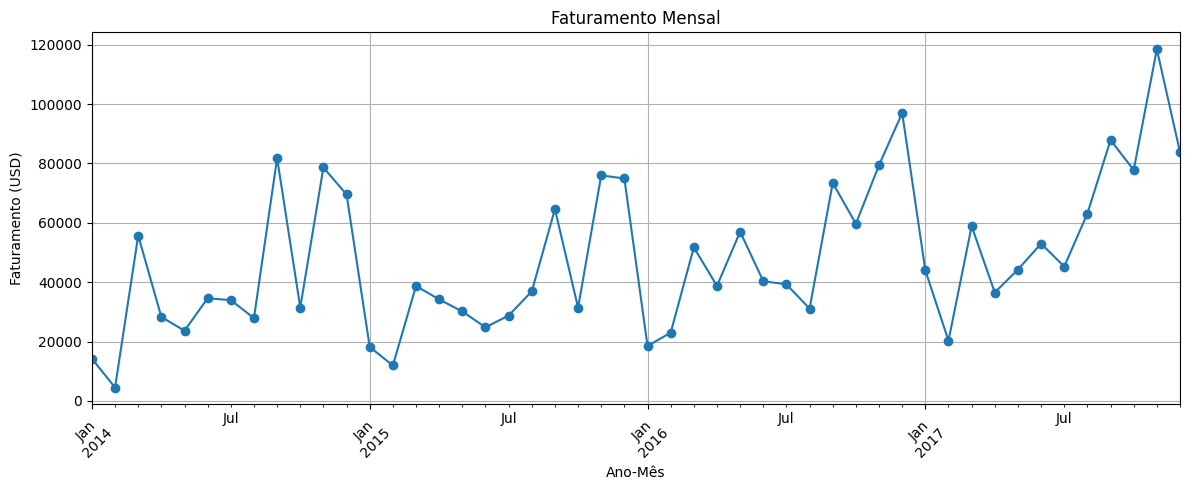

In [13]:
import matplotlib.pyplot as plt

# Agrupando por mês
monthly_sales = df.groupby('Year-Month')['Sales'].sum()

# Plotando
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o')
plt.title('Faturamento Mensal')
plt.ylabel('Faturamento (USD)')
plt.xlabel('Ano-Mês')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../img/faturamento_mensal.png')
plt.show()

Produtos mais vendidos em quantidade

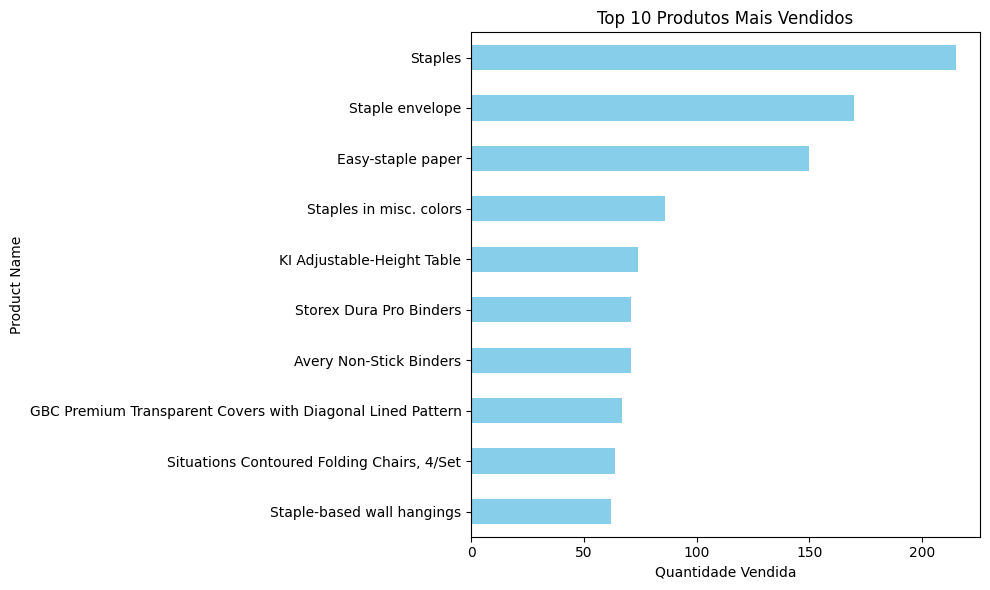

In [14]:
top_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('../img/produtos_mais_vendidos.png')
plt.show()

  Melhores clientes por valor total comprado

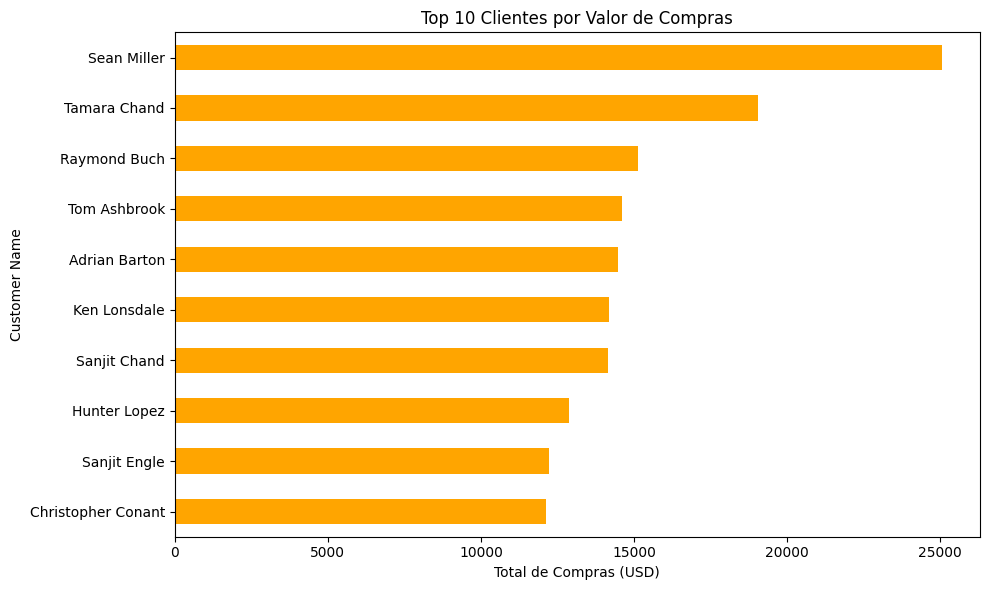

In [15]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Top 10 Clientes por Valor de Compras')
plt.xlabel('Total de Compras (USD)')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('../img/melhores_clientes.png')
plt.show()

Faturamento por categoria e subcategoria

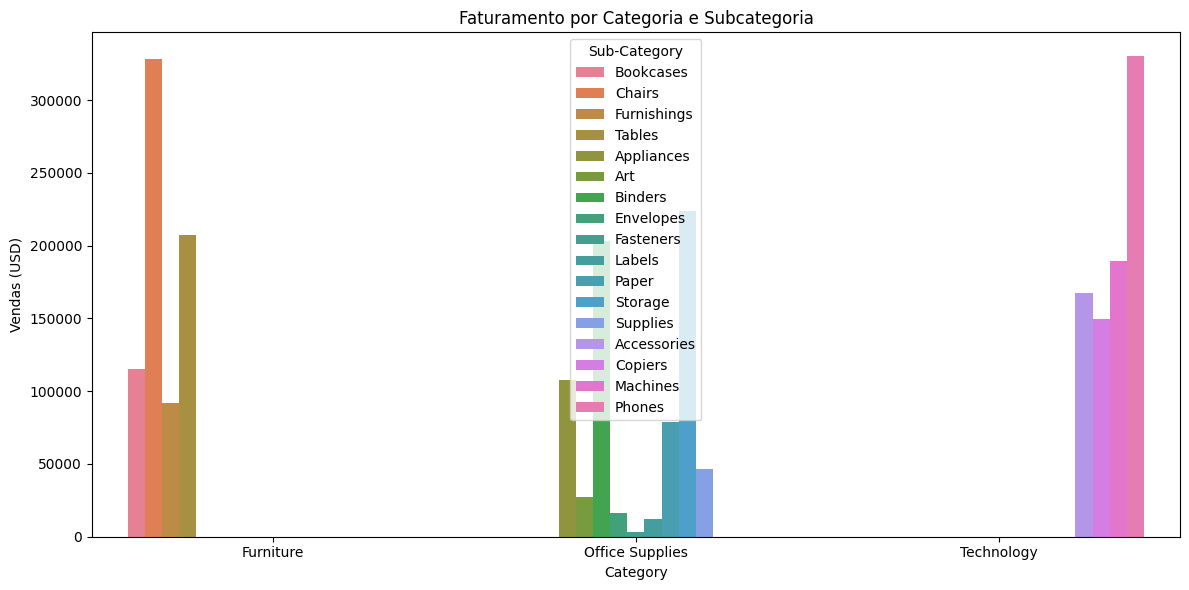

In [16]:
import seaborn as sns

category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Category', y='Sales', hue='Sub-Category')
plt.title('Faturamento por Categoria e Subcategoria')
plt.ylabel('Vendas (USD)')
plt.tight_layout()

plt.savefig('../img/faturamento_por_categoria.png')
plt.show()

Categorias com prejuízo

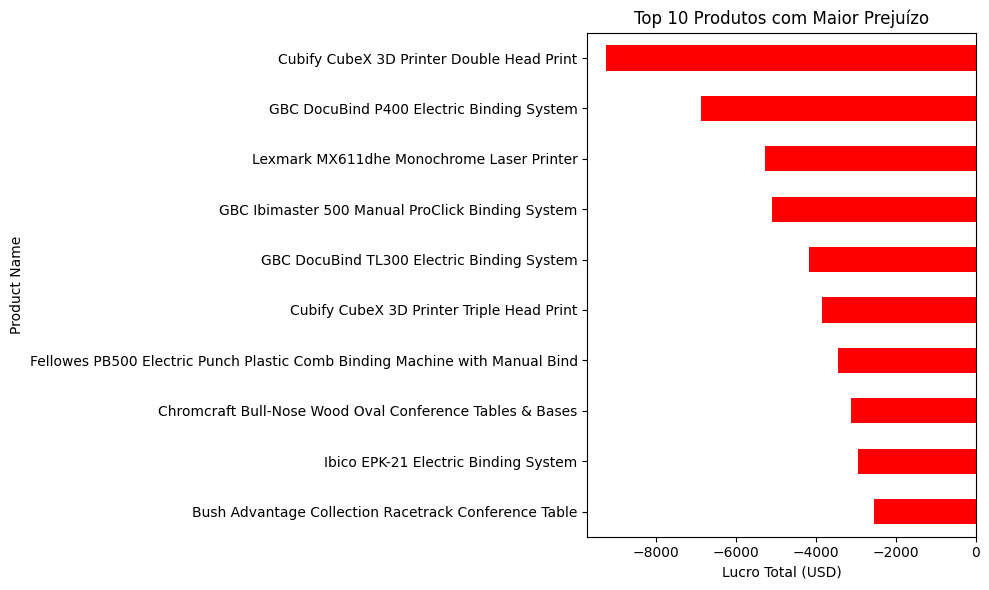

In [17]:
loss_products = df[df['Profit'] < 0].groupby('Product Name')['Profit'].sum().sort_values().head(10)

loss_products.plot(kind='barh', figsize=(10, 6), color='red')
plt.title('Top 10 Produtos com Maior Prejuízo')
plt.xlabel('Lucro Total (USD)')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('../img/categorias_com_prejuizo.png')
plt.show()